<a href="https://colab.research.google.com/github/RooKeeh/AI-Google-Colab/blob/main/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Utilizare pandas

In [1]:
import pandas as pd
dict_={'a':[11,21,31],'b':[12,22,32]}
df=pd.DataFrame(dict_)

In [25]:
print(df.head())
print(df.mean())

    a   b
0  11  12
1  21  22
2  31  32
a    21.0
b    22.0
dtype: float64


#NBA API

In [3]:
!pip install nba_api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255 kB 4.3 MB/s 


In [4]:
from nba_api.stats.static import teams #https://pypi.org/project/nba-api
import matplotlib.pyplot as plt
nba_teams=teams.get_teams()
print(nba_teams[0:3])

[{'id': 1610612737, 'full_name': 'Atlanta Hawks', 'abbreviation': 'ATL', 'nickname': 'Hawks', 'city': 'Atlanta', 'state': 'Atlanta', 'year_founded': 1949}, {'id': 1610612738, 'full_name': 'Boston Celtics', 'abbreviation': 'BOS', 'nickname': 'Celtics', 'city': 'Boston', 'state': 'Massachusetts', 'year_founded': 1946}, {'id': 1610612739, 'full_name': 'Cleveland Cavaliers', 'abbreviation': 'CLE', 'nickname': 'Cavaliers', 'city': 'Cleveland', 'state': 'Ohio', 'year_founded': 1970}]


In [6]:
def one_dict(list_dict):
  keys=list_dict[0].keys()
  out_dict={key:[] for key in keys}
  for dict_ in list_dict:
    for key,value in dict_.items():
      out_dict[key].append(value)
  return out_dict

In [7]:
dict_nba_team=one_dict(nba_teams)
df_teams=pd.DataFrame(dict_nba_team)
print(df_teams.head())

           id             full_name abbreviation   nickname         city  \
0  1610612737         Atlanta Hawks          ATL      Hawks      Atlanta   
1  1610612738        Boston Celtics          BOS    Celtics       Boston   
2  1610612739   Cleveland Cavaliers          CLE  Cavaliers    Cleveland   
3  1610612740  New Orleans Pelicans          NOP   Pelicans  New Orleans   
4  1610612741         Chicago Bulls          CHI      Bulls      Chicago   

           state  year_founded  
0        Atlanta          1949  
1  Massachusetts          1946  
2           Ohio          1970  
3      Louisiana          2002  
4       Illinois          1966  


In [10]:
df_warriors=df_teams[df_teams['nickname']=='Warriors']
print(df_warriors)
id_warriors=df_warriors[['id']].values[0][0]
print(id_warriors)

           id              full_name abbreviation  nickname          city  \
7  1610612744  Golden State Warriors          GSW  Warriors  Golden State   

        state  year_founded  
7  California          1946  
1610612744


In [14]:
from nba_api.stats.endpoints import leaguegamefinder
gamefinder=leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

In [15]:
games=gamefinder.get_data_frames()[0]
print(games.head())

  SEASON_ID     TEAM_ID TEAM_ABBREVIATION              TEAM_NAME     GAME_ID  \
0     22022  1610612744               GSW  Golden State Warriors  0022200220   
1     22022  1610612744               GSW  Golden State Warriors  0022200205   
2     22022  1610612744               GSW  Golden State Warriors  0022200197   
3     22022  1610612744               GSW  Golden State Warriors  0022200182   
4     22022  1610612744               GSW  Golden State Warriors  0022200156   

    GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB   REB  AST  \
0  2022-11-16    GSW @ PHX  L  240  119  ...   1.000   6.0  34.0  40.0   30   
1  2022-11-14  GSW vs. SAS  W  239  132  ...   0.938   5.0  35.0  40.0   35   
2  2022-11-13    GSW @ SAC  L  238  115  ...   0.938   8.0  35.0  43.0   27   
3  2022-11-11  GSW vs. CLE  W  240  106  ...   0.786   8.0  36.0  44.0   29   
4  2022-11-07  GSW vs. SAC  W  241  116  ...   0.667   8.0  40.0  48.0   28   

   STL  BLK  TOV  PF  PLUS_MINUS  
0    5   

In [16]:
games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']

In [18]:
games_home.mean()['PLUS_MINUS']
games_away.mean()['PLUS_MINUS']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


-2.966666666666667

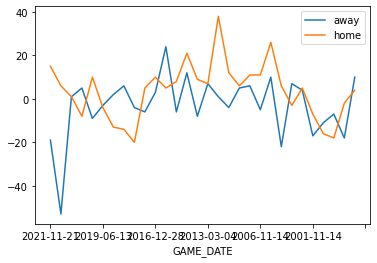

In [19]:
fig,ax=plt.subplots()
games_away.plot(x='GAME_DATE',y='PLUS_MINUS',ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS',ax=ax)
ax.legend(["away","home"])
plt.show()

#Exercitii:
1. Creati data-frame-uri si pt echipa “Cavaliers”.
2. Afisati pe grafic si informatiile Cavaliers vs Raptors.

In [20]:
df_cavaliers=df_teams[df_teams['nickname']=='Cavaliers']
print(df_cavaliers)
id_cavaliers=df_cavaliers[['id']].values[0][0]
print(id_cavaliers)
from nba_api.stats.endpoints import leaguegamefinder
gamefinder=leaguegamefinder.LeagueGameFinder(team_id_nullable=id_cavaliers)
games=gamefinder.get_data_frames()[0]
print(games.head())

           id            full_name abbreviation   nickname       city state  \
2  1610612739  Cleveland Cavaliers          CLE  Cavaliers  Cleveland  Ohio   

   year_founded  
2          1970  
1610612739
  SEASON_ID     TEAM_ID TEAM_ABBREVIATION            TEAM_NAME     GAME_ID  \
0     22022  1610612739               CLE  Cleveland Cavaliers  0022200216   
1     22022  1610612739               CLE  Cleveland Cavaliers  0022200193   
2     22022  1610612739               CLE  Cleveland Cavaliers  0022200182   
3     22022  1610612739               CLE  Cleveland Cavaliers  0022200171   
4     22022  1610612739               CLE  Cleveland Cavaliers  0022200158   

    GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB  REB  AST  \
0  2022-11-16    CLE @ MIL  L  241   98  ...   0.824     6    28   34   22   
1  2022-11-13  CLE vs. MIN  L  240  124  ...   0.692    16    24   40   22   
2  2022-11-11    CLE @ GSW  L  240  101  ...   0.731    14    32   46   25   
3  2022-11-09

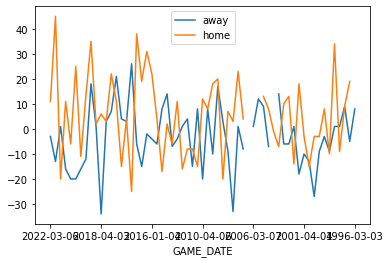

In [24]:
games_home=games[games['MATCHUP']=='CLE vs. TOR']
games_away=games[games['MATCHUP']=='CLE @ TOR']
fig,ax=plt.subplots()
games_away.plot(x='GAME_DATE',y='PLUS_MINUS',ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS',ax=ax)
ax.legend(["away","home"])
plt.show()